# Data Visualization Practice
### References
  * https://www.kaggle.com/dwin183287/30-days-of-ml-eda
  * https://www.kaggle.com/maximkazantsev/30dml-eda-xgboost

In [3]:
# import libraries

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print(sys.version)

3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]


In [4]:
# load train data (from Kaggle 30days of ML, https://www.kaggle.com/c/30-days-of-ml)

train = pd.read_csv('train.csv', index_col='id')

In [5]:
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [7]:
cat_features = [feature for feature in train.columns if 'cat' in feature]
cont_features = [feature for feature in train.columns if 'cont' in feature]

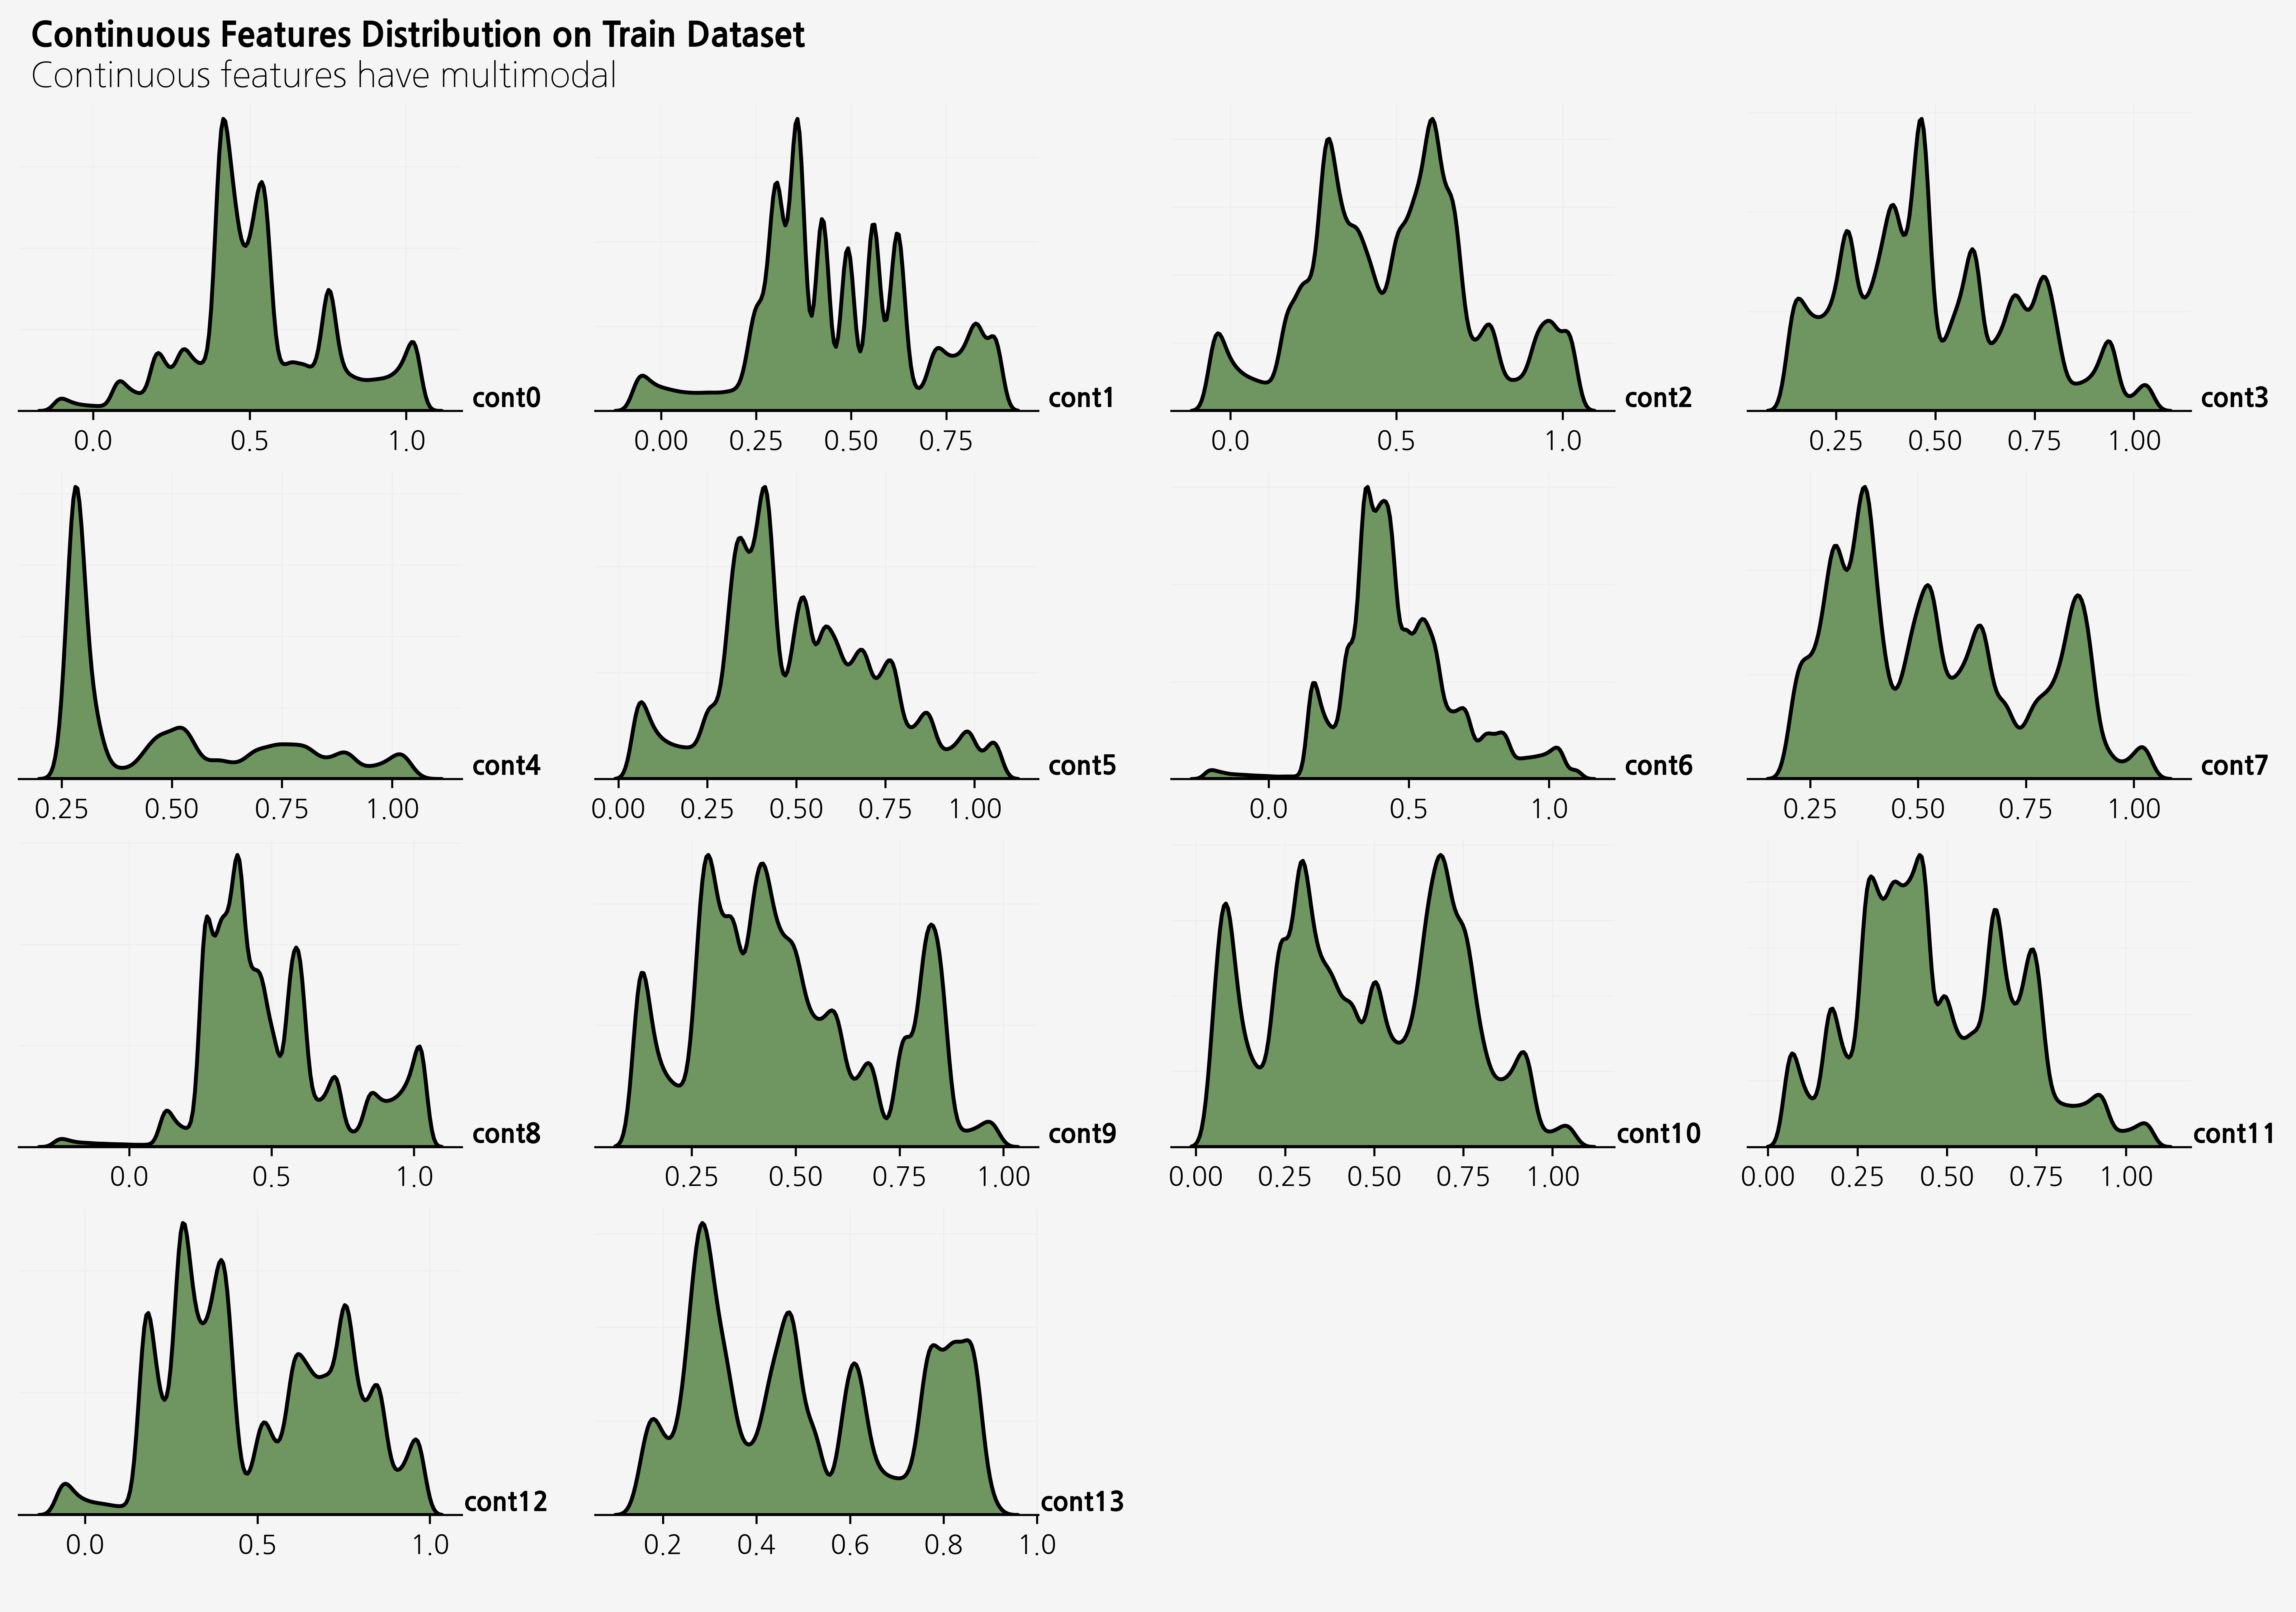

In [20]:
# basic statistics (cont data)

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(15,10), facecolor='#f6f5f5')
gs = fig.add_gridspec(4,4)
gs.update(wspace=0.3, hspace=0.2)

background_color = '#f6f5f5'

run_no = 0
for row in range(0,4):
    for col in range(0,4):
        locals()['ax'+str(run_no)] = fig.add_subplot(gs[row,col])
        locals()['ax'+str(run_no)].set_facecolor(background_color)
        locals()['ax'+str(run_no)].set_yticklabels([])
        locals()['ax'+str(run_no)].tick_params(axis='y', which=u'both', length=0)
        for s in ['top', 'right', 'left']:
            locals()['ax'+str(run_no)].spines[s].set_visible(False)
        run_no += 1
        
ax0.text(-0.2, 4.5, 'Continuous Features Distribution on Train Dataset', 
        fontsize=13, fontweight='bold')
ax0.text(-0.2, 4, 'Continuous features have multimodal', 
         fontsize=13, fontweight='light')

run_no = 0
for col in cont_features:
    sns.kdeplot(train[col], ax= locals()['ax'+str(run_no)], shade=True,
                color='#6f9660', edgecolor='black', linewidth=1.5, alpha=1, 
                zorder=3)
    locals()['ax'+str(run_no)].grid(which='major', axis='x', zorder=0, 
                                   color='#EEEEEE', linewidth=0.4)
    locals()['ax'+str(run_no)].grid(which='major', axis='y', zorder=0, 
                                   color='#EEEEEE', linewidth=0.4)
    locals()['ax'+str(run_no)].set_ylabel(col, fontsize=10, 
                                          fontweight='bold').set_rotation(0)
    locals()['ax'+str(run_no)].yaxis.set_label_coords(1.1,0)
    locals()['ax'+str(run_no)].set_xlabel(' ')
    run_no += 1
    
ax14.remove()
ax15.remove()

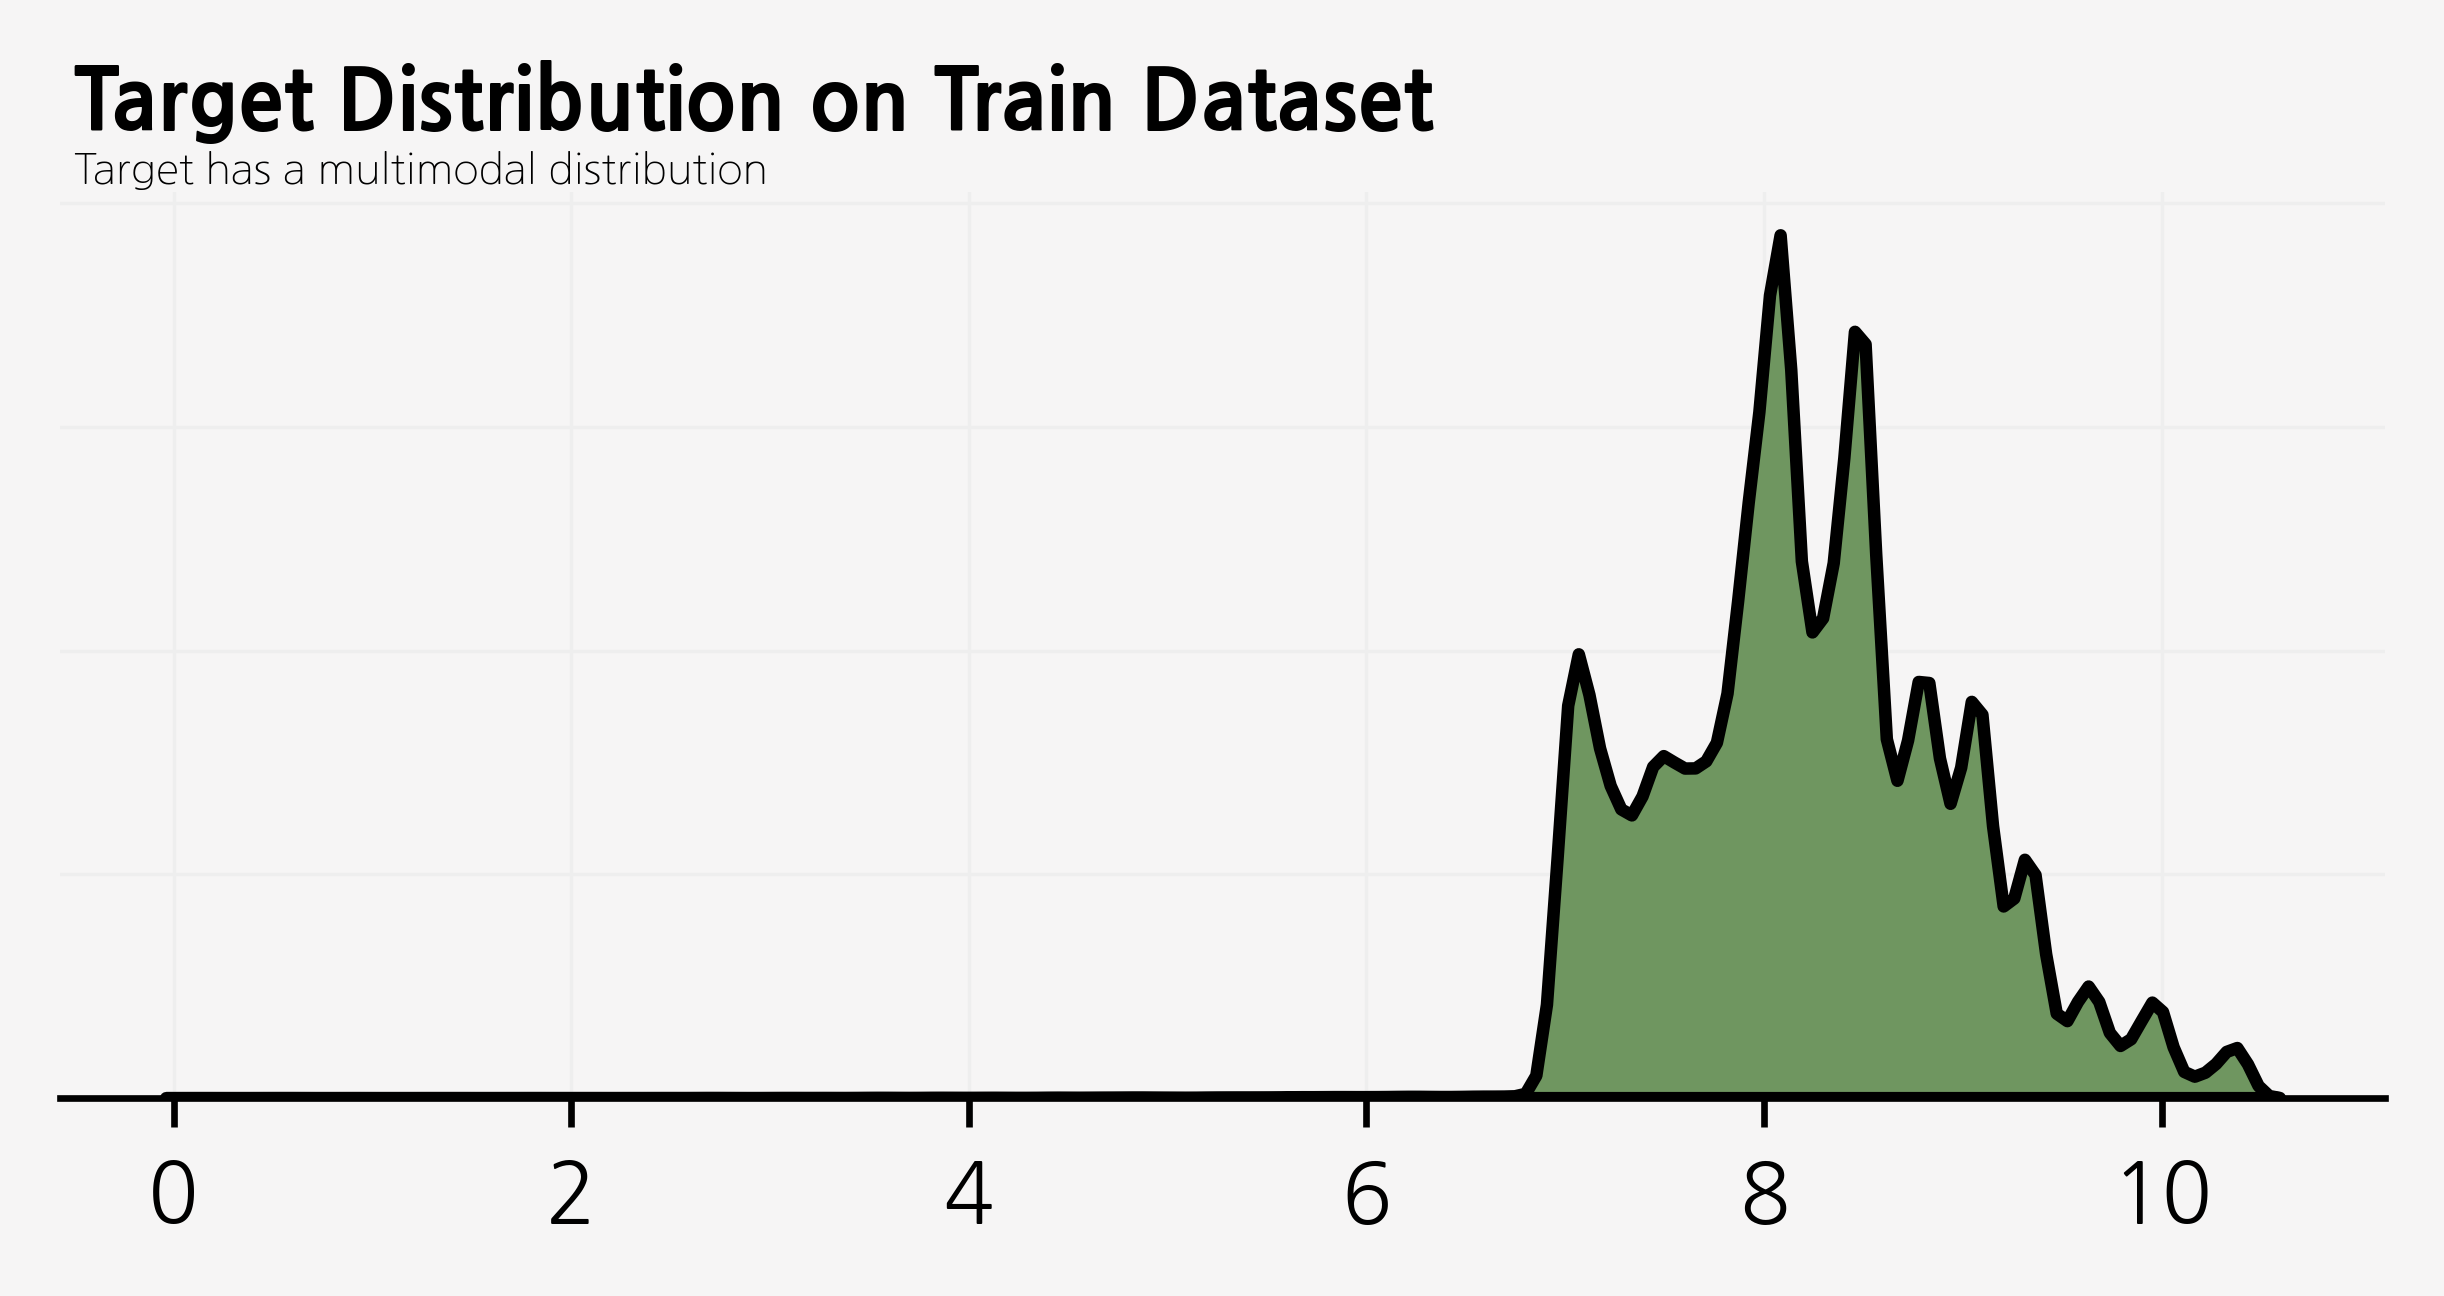

In [24]:
# basic statistics (target)

fig = plt.figure(figsize=(5,2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.2, hspace=0.05)

background_color = '#f6f5f5'

ax0 = fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)
ax0.set_yticklabels([])
ax0.tick_params(axis='y', which=u'both', length=0)
for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)
    
ax0.text(-0.5, 0.87, 'Target Distribution on Train Dataset', 
        fontsize=10, fontweight='bold')
ax0.text(-0.5, 0.82, 'Target has a multimodal distribution', 
         fontsize=5, fontweight='light')

sns.kdeplot(train['target'], ax=ax0, shade=True, color='#6f9660', 
           edgecolor='black', linewidth=1.5, alpha=1, zorder=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', 
        linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', 
        linewidth=0.4)
ax0.set_xlabel('')
ax0.set_ylabel('')

plt.show()